### Name: Fareed Hassan Khan
### ERP ID: 25367
### Assignment 2 Joint Distribution Effect

<div style="border: 1px solid black; padding:10px; border-radius: 5px;">
<p style="color:red;">Important Points</p>

Multiple Datasets has been used in this assignment to show whether or not joint PDF of independent variables makes an impact on dependent variable.
* Toyota Corolla Prices Dataset [dataset link](https://github.com/FareedKhan-dev/toyota_corolla_data)
* Red Wine Machine Learning Dataset [dataset link](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) 
* Self created Gaussian Distribution Dataset (generated by myself to show whether Joint PDF does make impact on perfectly normally distributed dataset or not?)

Multiple libraries have been used to create joint distribution of dependent variables
* symbulate
* scipy
    </div>

**Project Workflow**
1. [Initial steps](#initial)
    1. Installing Required Libraries
    2. Importing Libraries
2. [Machine Learning Methods](#ml-method)
    1. [Toyota Corolla Dataset](#first-data)
        1. Loading the dataframe (**selecting only numeric columns**)
        2. Checking columns distributions
        3. Default dataset
            1. Train/Test split
            2. Bulk ML Models Implementation on default dataset using lazypredict library
        4. Joint Distribution using symbulate
            1. Train/Test split
            2. Bulk ML Models Implementation on default dataset using lazypredict library
        5. Joint Distribution using scipy
            1. Train/Test split
            2. Bulk ML Models Implementation on default dataset using lazypredict library
        6. Conclusion
    2. [Red Wine Dataset](#second-data)
        1. Loading the dataframe (**selecting only numeric columns**)
        2. Checking columns distributions
        3. Default dataset
            1. Train/Test split
            2. Bulk ML Models Implementation on default dataset using lazypredict library
        4. Joint Distribution using symbulate
            1. Train/Test split
            2. Bulk ML Models Implementation on default dataset using lazypredict library
        5. Joint Distribution using scipy
            1. Train/Test split
            2. Bulk ML Models Implementation on default dataset using lazypredict library
        6. Conclusion
    3. [Self Created Gaussian Dataset](#third-data)
        1. Checking columns distributions
        2. Default dataset
            1. Train/Test split
            2. Bulk ML Models Implementation on default dataset using lazypredict library
        3. Joint Distribution using symbulate
            1. Train/Test split
            2. Bulk ML Models Implementation on default dataset using lazypredict library
        4. Joint Distribution using scipy
            1. Train/Test split
            2. Bulk ML Models Implementation on default dataset using lazypredict library
        5. Conclusion

<a name="initial"></a>
## Initial Steps

In [1]:
%%capture
# Installing required libraries
!pip install lazypredict
!pip install symbulate

# To remove warnings
import warnings
warnings.filterwarnings("ignore")

# Importing libraries
from scipy.stats import multivariate_normal
from symbulate import *
import lazypredict
from lazypredict.Supervised import LazyRegressor
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from symbulate import *
from IPython.core.display import display, HTML
import seaborn as sns
from numpy.random import normal

# floating values to display upto 2 decimels
pd.options.display.float_format = '{:,.2f}'.format

<a name="ml-method"></a>
## Machine Learning Methods

<a name="first-data"></a>
Toyota Corolla Dataset

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:23<00:00,  1.76it/s]


As you can see that some columns do follow normal distribution while some columns follow normal distribution not 100% but upto some extent


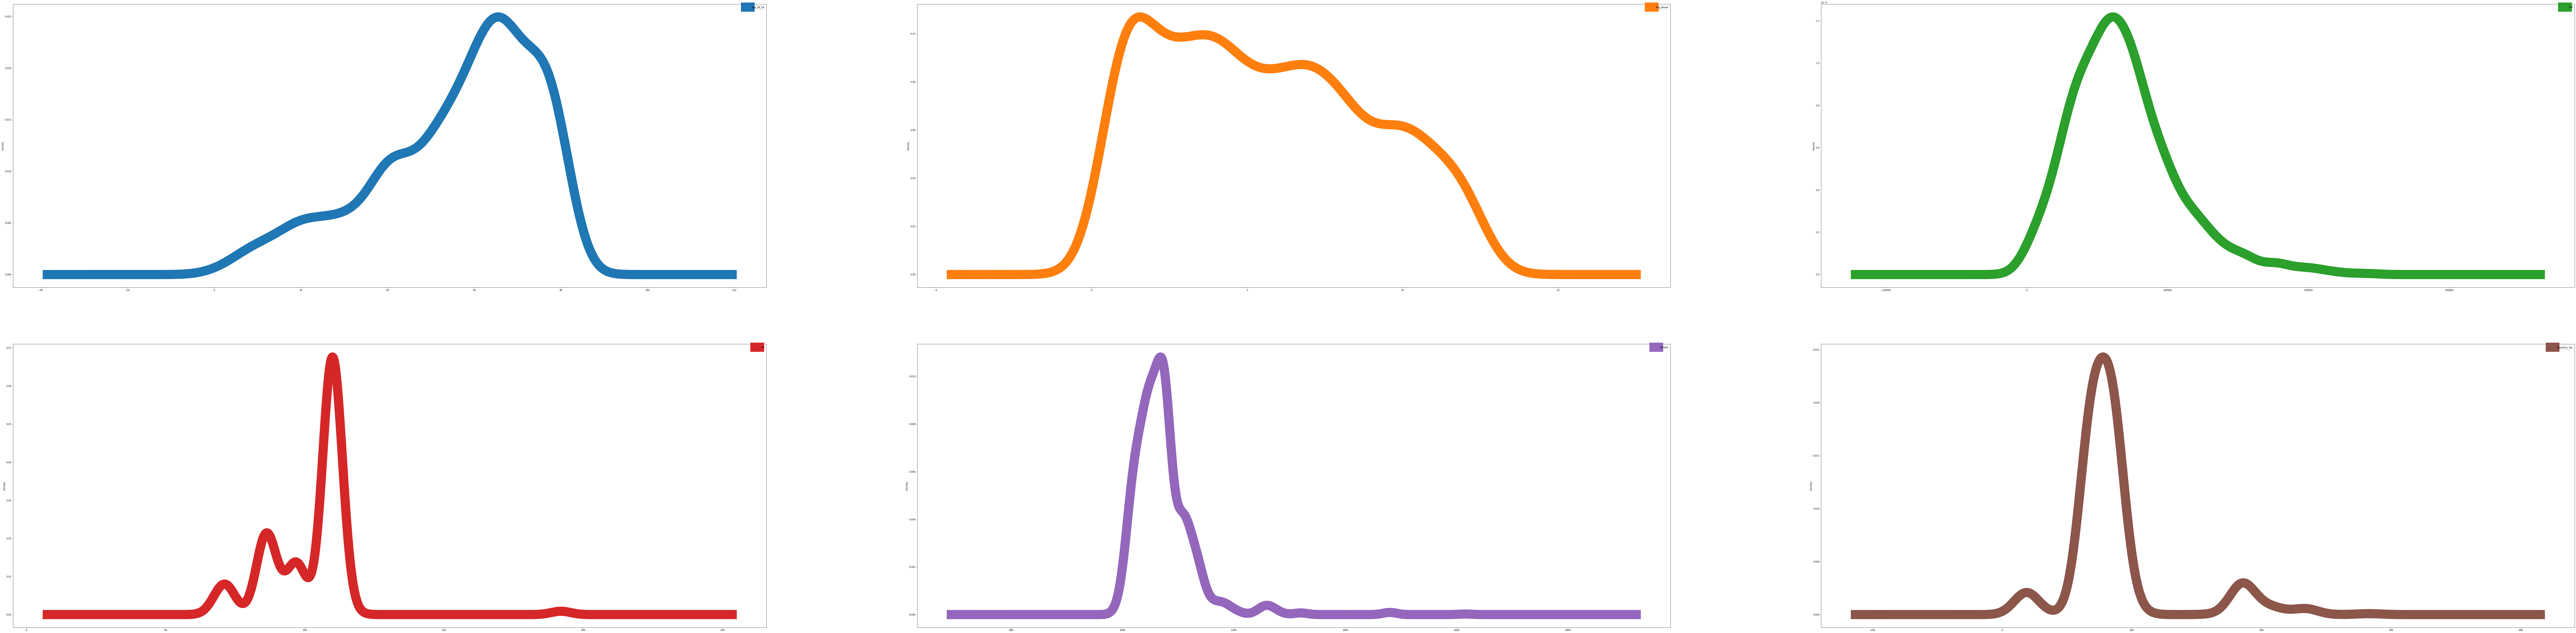



Showing results of all approaches


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,0.907781,0.909068,1199.758349,0.023959
GradientBoostingRegressor,0.895540,0.896997,1276.908544,0.216730
RandomForestRegressor,0.888971,0.890520,1316.443312,0.272823
ExtraTreesRegressor,0.883766,0.885388,1346.945992,0.546117
BaggingRegressor,0.881118,0.882777,1362.205796,0.084661
,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoLarsCV,-0.014192,-0.000041,3643.776462,0.013362
LarsCV,-0.014192,-0.000041,3643.776462,0.001856


Result generated using joint distribution are very bad as compared to default dataset, Indicating that these variables are independent and loss functions does not influenced by all of them (combined),  So joint PDF has no use on this dataset, because on independency, X variables has no relation with each other but with Y variable.


In [2]:
# Loading Dataset and selecting only numeric columns
df = pd.read_excel('ToyotaCorolla.xls')
df = df[['Age_08_04','Mfg_Month','KM', 'HP', 'Weight', 'Quarterly_Tax', 'Price']]

# Creating X and y variables
X = df.loc[:, df.columns != 'Price']
y = df['Price']

# Default Data ---- Model Implementation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
multiple_ML_model = LazyRegressor(verbose=False, ignore_warnings=True, predictions=True)
models_default, predictions = multiple_ML_model .fit(X_train, X_test, y_train, y_test)

# Symbulate Library ------ Joint sample ML Models Implementation
each_col_mean = []
for each in X.columns:
    each_col_mean.append(X[each].mean())
cov = np.array(X.cov())
a,b,c,d,e,f = RV(MultivariateNormal(mean = each_col_mean, cov = cov))
joint_X_list = []
for each in (a, b, c, d, e, f):
    joint_X_list.append(list(each.sim(1436)))
joint_X_symbulate = pd.DataFrame(joint_X_list).transpose()
X_train, X_test, y_train, y_test = train_test_split(joint_X_symbulate, y, test_size=0.3)
multiple_ML_model = LazyRegressor(verbose=False, ignore_warnings=True, predictions=True)
models_symbulate_joint, predictions = multiple_ML_model .fit(X_train, X_test, y_train, y_test)

# Scipy Library ------ Joint sample ML Models Implementation
distr = multivariate_normal(mean = each_col_mean, cov = cov)
data = distr.rvs(size = 1436)
joint_X_scipy = pd.DataFrame(data)
X_train, X_test, y_train, y_test = train_test_split(joint_X_scipy, y, test_size=0.3)
multiple_ML_model = LazyRegressor(verbose=False, ignore_warnings=True, predictions=True)
models_scipy_joint, predictions = multiple_ML_model .fit(X_train, X_test, y_train, y_test)

# printing conclusion of first dataset in a compiled form
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(200,50))
X.plot(subplots=True, ax=axes, kind='kde', lw=40)
print('As you can see that some columns do follow normal distribution while some columns follow normal distribution not 100% but upto some extent')
plt.show()
print('\n')
def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))
print("Showing results of all approaches")
display_side_by_side([models_default.head(), models_symbulate_joint.head(), 
                                        models_scipy_joint.head()], ['Default Dataset Result',  'Symbulate Library generated Joint sample Dataset Result', 
                                                                                           'Scipy Library generated Joint sample Dataset Result'])

print('Result generated using joint distribution are very bad as compared to default dataset, Indicating that these variables are independent and loss functions does not influenced by all of them (combined),  So joint PDF has no use on this dataset, because on independency, X variables has no relation with each other but with Y variable.')

Moreover by plotting joint distribution of any two independent variables we do see that they dont follow any trend indicating they are indpendent, which further prooves that in this dataset there is no joint relationship exist.

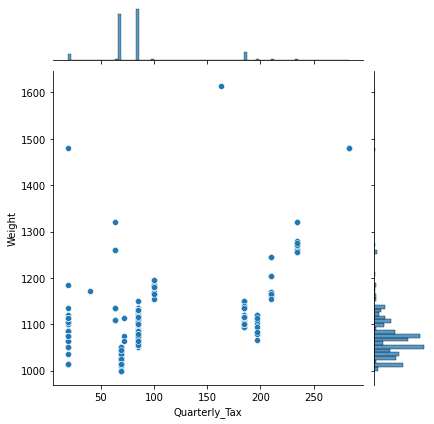

In [3]:
sns.jointplot(df['Quarterly_Tax'], df['Weight'], data=df)
plt.show()

_____

<a name="second-data"></a>
Red Wine Dataset

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:27<00:00,  1.53it/s]


As you can see that most of the columns do follow normal distribution while some columns follow normal distribution not 100% but upto some extent


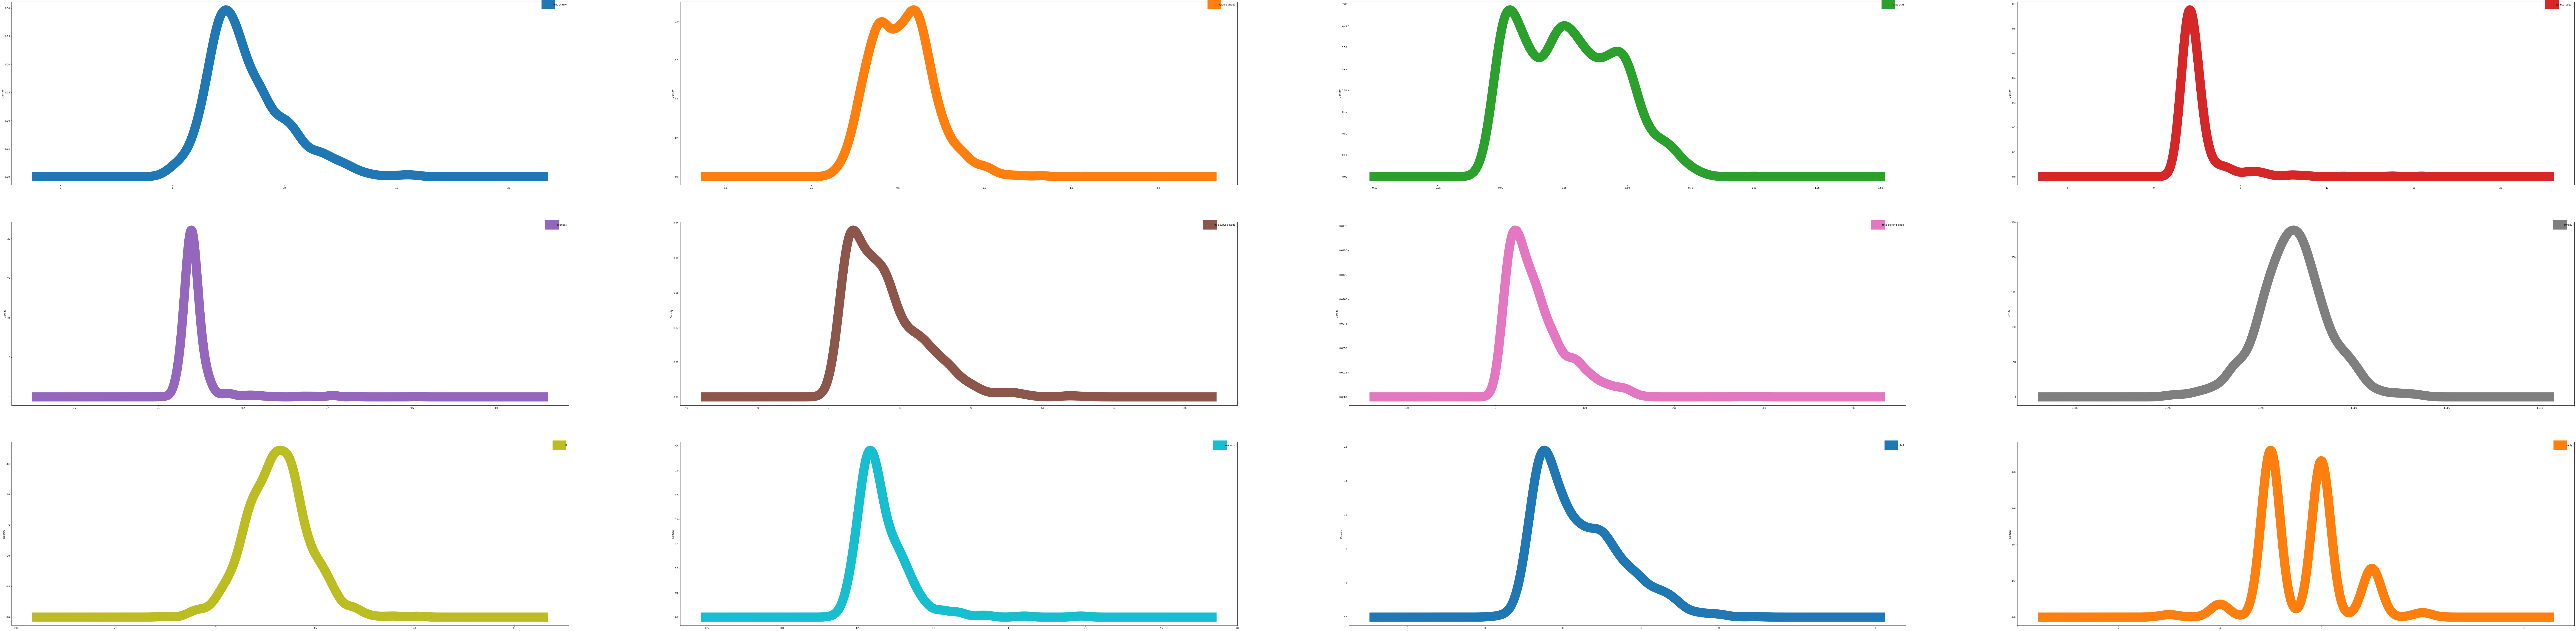



Showing results of all approaches


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.489568,0.501290,0.594322,0.159436
RandomForestRegressor,0.472528,0.484641,0.604161,0.387646
HistGradientBoostingRegressor,0.449656,0.462295,0.617120,0.415058
BaggingRegressor,0.439546,0.452417,0.622763,0.047422
LGBMRegressor,0.436638,0.449576,0.624376,0.062963
,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoLarsCV,-0.023581,-0.000075,0.787604,0.015995
ElasticNetCV,-0.023581,-0.000075,0.787604,0.041293


Result generated using joint distribution are very bad as compared to default dataset, Indicating that these variables are independent and loss functions does not influenced by all of them (combined),  So joint PDF has no use on this dataset, because on independency, X variables has no relation with each other but with Y variable.


In [4]:
# Loading Dataset and selecting only numeric columns
df = pd.read_csv('winequality-red.csv')
# df = df[['Age_08_04','Mfg_Month','KM', 'HP', 'Weight', 'Quarterly_Tax', 'Price']]

# Creating X and y variables
X = df.loc[:, df.columns != 'quality']
y = df['quality']

# Default Data ---- Model Implementation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
multiple_ML_model = LazyRegressor(verbose=False, ignore_warnings=True, predictions=True)
models_default, predictions = multiple_ML_model .fit(X_train, X_test, y_train, y_test)

# Symbulate Library ------ Joint sample ML Models Implementation
each_col_mean = []
for each in X.columns:
    each_col_mean.append(X[each].mean())
cov = np.array(X.cov())
a,b,c,d,e,f,g,h,i,k,l = RV(MultivariateNormal(mean = each_col_mean, cov = cov))
joint_X_list = []
for each in (a,b,c,d,e,f,g,h,i,k,l):
    joint_X_list.append(list(each.sim(1599)))
joint_X_symbulate = pd.DataFrame(joint_X_list).transpose()
X_train, X_test, y_train, y_test = train_test_split(joint_X_symbulate, y, test_size=0.3)
multiple_ML_model = LazyRegressor(verbose=False, ignore_warnings=True, predictions=True)
models_symbulate_joint, predictions = multiple_ML_model .fit(X_train, X_test, y_train, y_test)

# Scipy Library ------ Joint sample ML Models Implementation
distr = multivariate_normal(mean = each_col_mean, cov = cov)
data = distr.rvs(size = 1599)
joint_X_scipy = pd.DataFrame(data)
X_train, X_test, y_train, y_test = train_test_split(joint_X_scipy, y, test_size=0.3)
multiple_ML_model = LazyRegressor(verbose=False, ignore_warnings=True, predictions=True)
models_scipy_joint, predictions = multiple_ML_model .fit(X_train, X_test, y_train, y_test)

# printing conclusion of first dataset in a compiled form
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(200,50))
df.plot(subplots=True, ax=axes, kind='kde', lw=40)
print('As you can see that most of the columns do follow normal distribution while some columns follow normal distribution not 100% but upto some extent')
plt.show()
print('\n')
def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))
print("Showing results of all approaches")
display_side_by_side([models_default.head(), models_symbulate_joint.head(), 
                                        models_scipy_joint.head()], ['Default Dataset Result',  'Symbulate Library generated Joint sample Dataset Result', 
                                                                                           'Scipy Library generated Joint sample Dataset Result'])

print('Result generated using joint distribution are very bad as compared to default dataset, Indicating that these variables are independent and loss functions does not influenced by all of them (combined),  So joint PDF has no use on this dataset, because on independency, X variables has no relation with each other but with Y variable.')

Moreover by plotting joint distribution of any two independent variables we do see that they dont follow any trend indicating they are indpendent, which further prooves that in this dataset there is no joint relationship exist.

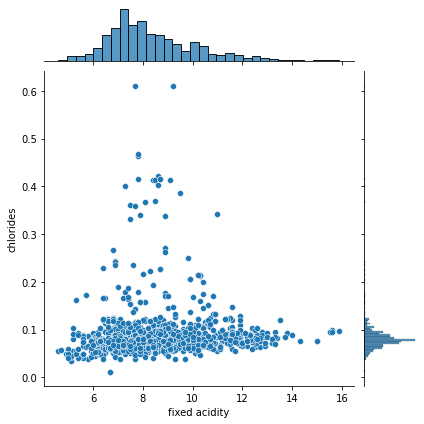

In [5]:
sns.jointplot(df['fixed acidity'], df['chlorides'], data=df)
plt.show()

_____

<a name="third-data"></a>
Self Created Gaussian Distribution Dataset

I have generated X columns, all are perfectly normally distributed but they are not dependent to each other indicating that results will going to be very bad, In order to proove this statement:

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:12<00:00,  3.36it/s]


As you can see all columns are perfectly normally distributed


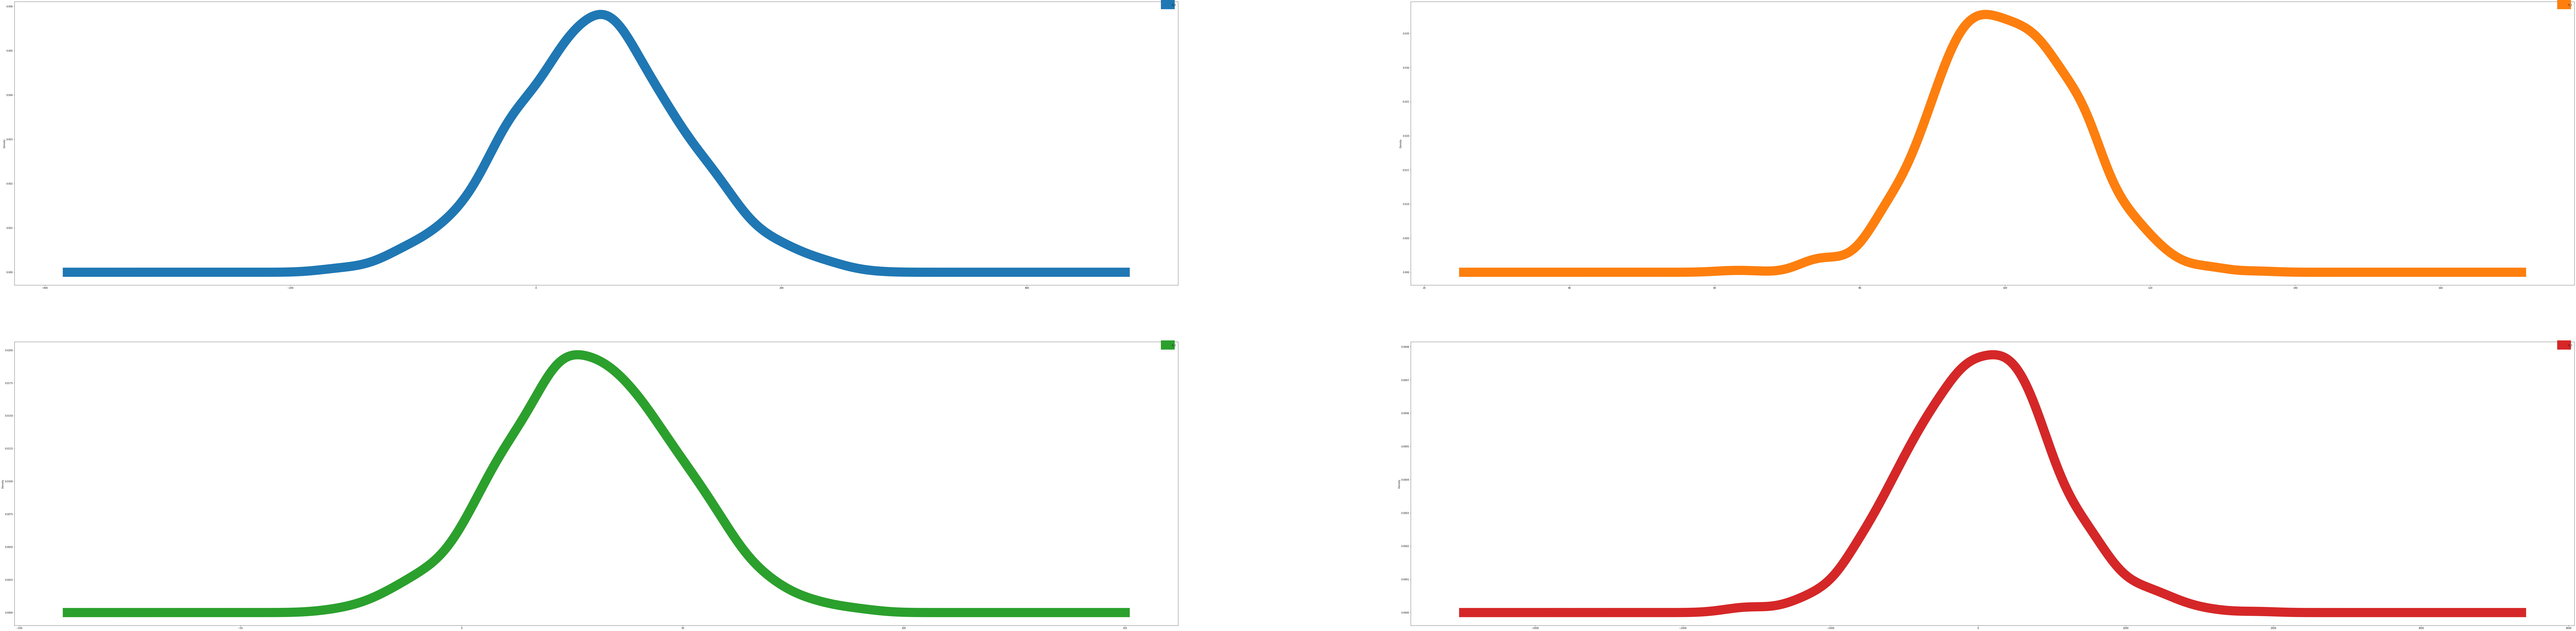



Showing results of all approaches


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoLarsCV,1.000000,1.000000,0.000000,0.000000
HuberRegressor,1.000000,1.000000,0.000000,0.032210
BayesianRidge,1.000000,1.000000,0.000000,0.008015
RANSACRegressor,1.000000,1.000000,0.000000,0.007999
LinearSVR,1.000000,1.000000,0.000000,0.015643
,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
SVR,-0.018488,-0.004862,99.131647,0.029490
NuSVR,-0.019340,-0.005703,99.173100,0.024029


Result are same i.e., very bad with joint distribution because X are indepedent to each other and have no joint effect on Y.


In [6]:
# Creating an distribution dataframe
df = pd.DataFrame()

df['X_0'] = normal(loc=50, scale=70, size=1000)
df['X_1'] = normal(loc=100, scale=10, size=1000)
df['X_2'] = normal(loc=30, scale=20, size=1000)
df['X_3'] = normal(loc=10, scale=500, size=1000)
df['regression_y'] = (df['X_0'] + df['X_1'] + df['X_2'] + df['X_3'])/5 

# Creating X and y variables
X = df.loc[:, df.columns != 'regression_y']
y = df['regression_y']

# Default Data ---- Model Implementation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
multiple_ML_model = LazyRegressor(verbose=False, ignore_warnings=True, predictions=True)
models_default, predictions = multiple_ML_model .fit(X_train, X_test, y_train, y_test)

# Symbulate Library ------ Joint sample ML Models Implementation
each_col_mean = []
for each in X.columns:
    each_col_mean.append(X[each].mean())
cov = np.array(X.cov())
a,b,c,d = RV(MultivariateNormal(mean = each_col_mean, cov = cov))
joint_X_list = []
for each in (a,b,c,d):
    joint_X_list.append(list(each.sim(1000)))
joint_X_symbulate = pd.DataFrame(joint_X_list).transpose()
X_train, X_test, y_train, y_test = train_test_split(joint_X_symbulate, y, test_size=0.3)
multiple_ML_model = LazyRegressor(verbose=False, ignore_warnings=True, predictions=True)
models_symbulate_joint, predictions = multiple_ML_model .fit(X_train, X_test, y_train, y_test)

# Scipy Library ------ Joint sample ML Models Implementation
distr = multivariate_normal(mean = each_col_mean, cov = cov)
data = distr.rvs(size = 1000)
joint_X_scipy = pd.DataFrame(data)
X_train, X_test, y_train, y_test = train_test_split(joint_X_scipy, y, test_size=0.3)
multiple_ML_model = LazyRegressor(verbose=False, ignore_warnings=True, predictions=True)
models_scipy_joint, predictions = multiple_ML_model .fit(X_train, X_test, y_train, y_test)

# printing conclusion of first dataset in a compiled form
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(200,50))
X.plot(subplots=True, ax=axes, kind='kde', lw=40)
print('As you can see all columns are perfectly normally distributed')
plt.show()
print('\n')
def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))
print("Showing results of all approaches")
display_side_by_side([models_default.head(), models_symbulate_joint.head(), 
                                        models_scipy_joint.head()], ['Default Dataset Result',  'Symbulate Library generated Joint sample Dataset Result', 
                                                                                           'Scipy Library generated Joint sample Dataset Result'])

print('Result are same i.e., very bad with joint distribution because X are indepedent to each other and have no joint effect on Y.')